In [1]:
from tensorflow import keras
print('keras: ', keras.__version__)

keras:  2.8.0


# A first look at a neural network

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify hand-written digits. 

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. 

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [3]:
train_images.shape

(60000, 28, 28)

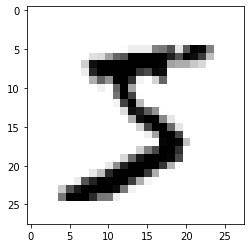

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

In [5]:
print(train_labels.shape)
print(len(train_labels))

(60000,)
60000


In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the test data:

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
print(test_labels)
print(len(test_labels))

[7 2 1 ... 4 5 6]
10000


Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we 
will verify if these predictions match the labels from `test_labels`.

Let's build our network.

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each 
score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: this is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).


In [10]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [11]:
x_train = train_images.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = test_images.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

We also need to categorically encode the labels:

In [12]:
train_labels[0]

5

In [13]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

We are now ready to train our network, which in Keras it is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [15]:
network.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2568 - acc: 0.9267
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1041 - acc: 0.9693
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0681 - acc: 0.9798
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0496 - acc: 0.9849
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0374 - acc: 0.9889


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [16]:
test_loss, test_acc = network.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0647 - acc: 0.9805 - 836ms/epoch - 3ms/step


In [17]:
print('test_acc:', test_acc)

test_acc: 0.9804999828338623



Our test set accuracy turns out to be about 98% -- that's quite a bit lower than the training set accuracy. 
This gap between training accuracy and test accuracy is an example of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data. 

This concludes our very first example -- you just saw how we could build and train a neural network to classify handwritten digits, in 
less than 20 lines of Python code. 

Pick a test image by choosing index number and take a look at how the model make the prediction. 

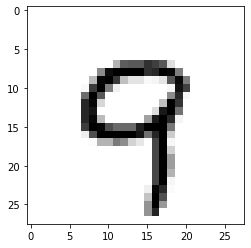

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

index = 105 # 0 to 9999
plt.imshow(test_images[index], cmap=plt.cm.binary)
plt.show()

In [19]:
pred = network.predict(x_test[index].reshape(1,28*28,))
print('the digit is: ', pred.argmax())
print('detailed probability outputs: \n', pred)

the digit is:  9
detailed probability outputs: 
 [[3.3354197e-10 7.8934576e-12 3.0507547e-08 1.7374283e-05 2.3826320e-05
  7.7675641e-06 2.9082989e-11 1.9710703e-06 3.9273500e-06 9.9994504e-01]]
